In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


****Importing the Necessary Libraries**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import torch
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,precision_recall_curve,auc,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Using train_test_split**

In [4]:
x,y=df[df.columns[:-1]],df[df.columns[-1]]
x=x.drop(columns=['Time'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42,stratify=y)#we stratified this due to low imbalanced data

**Logistic Regression Model**

In [5]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

**Generating the Classification Report for the Testing dataset**

Following is the classification report of LogisticRegression()for testing
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.67      0.75        49

    accuracy                           1.00     28481
   macro avg       0.92      0.84      0.87     28481
weighted avg       1.00      1.00      1.00     28481



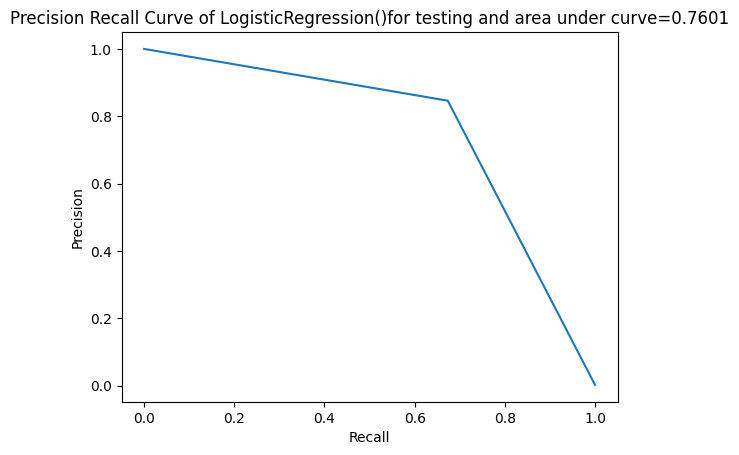

In [14]:
y_pred=model.predict(x_test)
  
print('Following is the classification report of {}for testing'.format(model))
print(classification_report(y_test,y_pred))
precision,recall,threshold=precision_recall_curve(y_test,y_pred)
plt.plot(recall,precision)
plt.title('Precision Recall Curve of {}for testing and area under curve={:0.4f}'.format(model,auc(recall,precision)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**Generating the Classification Report for the Training dataset**

Following is the classification report of LogisticRegression() for traning
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.88      0.68      0.77       443

    accuracy                           1.00    256326
   macro avg       0.94      0.84      0.88    256326
weighted avg       1.00      1.00      1.00    256326



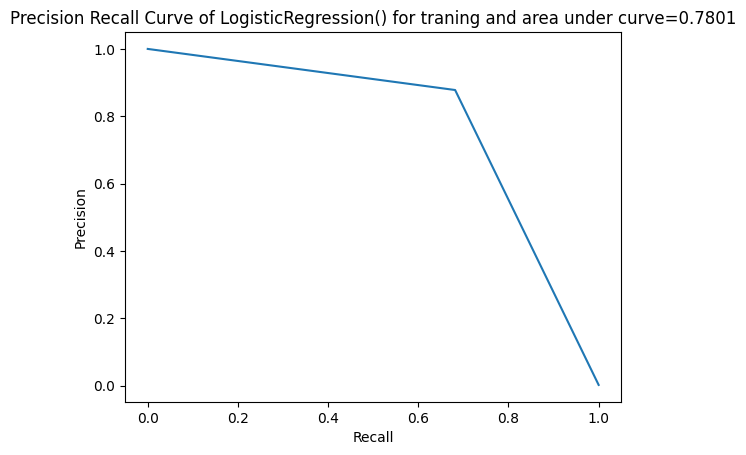

In [13]:
y_pred_train=model.predict(x_train)
  
print('Following is the classification report of {} for traning'.format(model))
print(classification_report(y_train,y_pred_train))
      
precision,recall,threshold=precision_recall_curve(y_train,y_pred_train)
plt.plot(recall,precision)
plt.title('Precision Recall Curve of {} for traning and area under curve={:0.4f}'.format(model,auc(recall,precision)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [21]:
save_path = "/kaggle/working/save_path.py"
joblib.dump(model, save_path)

['/kaggle/working/save_path.py']

**Regularization**

In [9]:
folds=KFold(n_splits=5, shuffle=True, random_state=5)
params = {"C": [0.01, 0.1, 1, 10, 100, 1000],
          "penalty": ["l1", "l2"],
          "solver": ["liblinear"]}
lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr,
                     param_grid=params,
                     cv=5,
                     verbose=1,
                     return_train_score=True)

lr_cv.fit(x_train, y_train)

print("Best Parameters:", lr_cv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


**Generating the Classification Report for the Training dataset**

Classification Report for Train Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.88      0.68      0.77       443

    accuracy                           1.00    256326
   macro avg       0.94      0.84      0.88    256326
weighted avg       1.00      1.00      1.00    256326



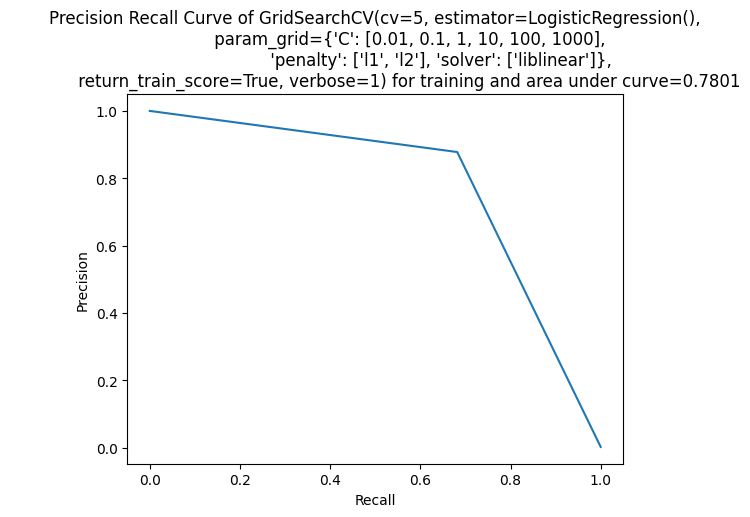

In [10]:
LR=LogisticRegression(C=1)
LR.fit(x_train,y_train)
y_train_prdn = LR.predict(x_train)

train_report = classification_report(y_train, y_train_prdn)
print("Classification Report for Train Dataset:")
print(train_report)
precision,recall,threshold=precision_recall_curve(y_train,y_train_prdn)
plt.plot(recall,precision)
plt.title('Precision Recall Curve of {} for training and area under curve={:0.4f}'.format(lr_cv,auc(recall,precision)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**Generating the Classification Report for the Testing dataset**

Classification Report for Test Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.67      0.75        49

    accuracy                           1.00     28481
   macro avg       0.92      0.84      0.87     28481
weighted avg       1.00      1.00      1.00     28481



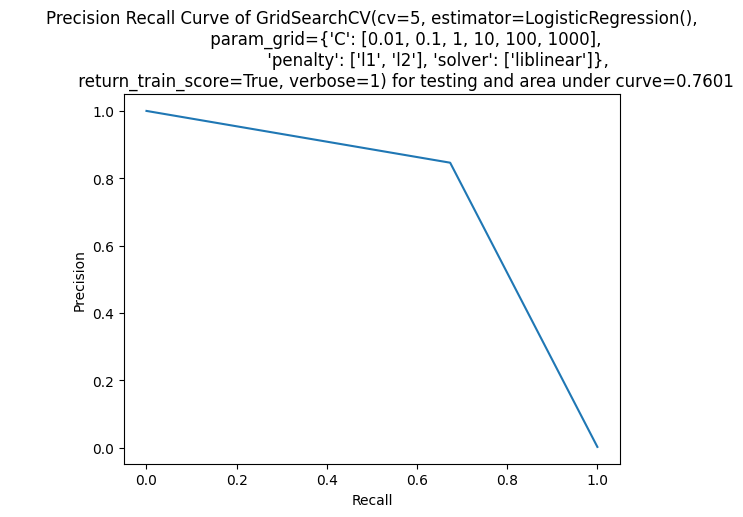

In [11]:
LR=LogisticRegression(C=1)
LR.fit(x_train,y_train)
y_test_prdn = LR.predict(x_test)

test_report = classification_report(y_test, y_test_prdn)
print("Classification Report for Test Dataset:")
print(test_report)
precision,recall,threshold=precision_recall_curve(y_test,y_test_prdn)
plt.plot(recall,precision)
plt.title('Precision Recall Curve of {} for testing and area under curve={:0.4f}'.format(lr_cv,auc(recall,precision)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**Using SMOTE**

In [8]:
smote=SMOTE(random_state=45)
X_train, Y_train=smote.fit_resample(x_train,y_train)

In [11]:
#defining a function for a model so that it reduces the code that we have to write again for every single model
def Model_Report(model,X_train,x_test,Y_train,y_test):
  #training the data to specified model
    model.fit(X_train,Y_train)
  #predicting data(testing)
    Y_pred=model.predict(x_test)
  #classification report for a specified model
    print('Following is the classification report of {}'.format(model))
    print(classification_report(y_test,Y_pred))
      #PR Curve
    precision,recall,threshold=precision_recall_curve(y_test,Y_pred)
    plt.plot(recall,precision)
    plt.title('Precision Recall Curve of {} and area under curve={:0.4f}'.format(model,auc(recall,precision)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

Following is the classification report of LogisticRegression()
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.07      0.92      0.13        49

    accuracy                           0.98     28481
   macro avg       0.53      0.95      0.56     28481
weighted avg       1.00      0.98      0.99     28481



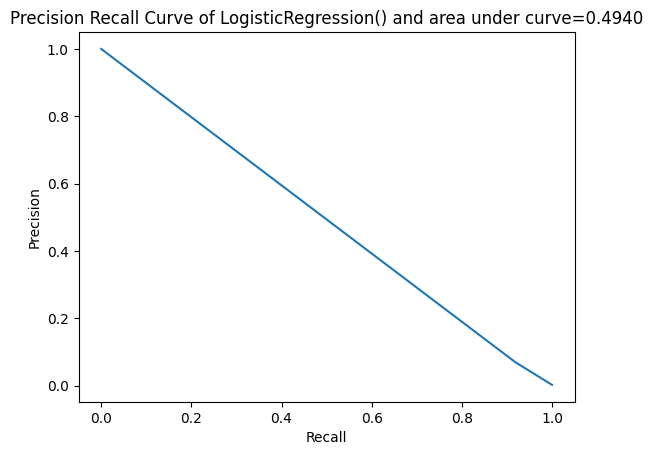

In [12]:
#Logistic regression model
Model_Report(LogisticRegression(),X_train,x_test,Y_train,y_test)

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
folds=KFold(n_splits=5, shuffle=True, random_state=5)
params={"C":[0.01,0.1,1,10,100,1000],"penalty":["l1","l2"],"solver":["liblinear"]}
Lr=LogisticRegression()
Lr_cv=GridSearchCV(estimator=Lr,
                         param_grid=params,
                         scoring="roc_auc",
                         cv=5,
                         verbose=1,
                         return_train_score=True)

Lr_cv.fit(X_train,Y_train)

print("Best Parameters :", Lr_cv.best_params_)
print('Best ROC AUC Score :', Lr_cv.best_score_)

Y_pred=Lr_cv.predict(x_test)
roc_auc=roc_auc_score(y_test,Y_pred)
print("Test ROC AUC Score :",roc_auc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters : {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC Score : 0.9976326962060066
Test ROC AUC Score : 0.954083786018628


In [19]:
L_R=LogisticRegression(C=0.1)
L_R_model=L_R.fit(X_train,Y_train)
Y_pred=L_R.predict(x_test)
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     28432
           1       0.04      0.88      0.08        49

    accuracy                           0.96     28481
   macro avg       0.52      0.92      0.53     28481
weighted avg       1.00      0.96      0.98     28481



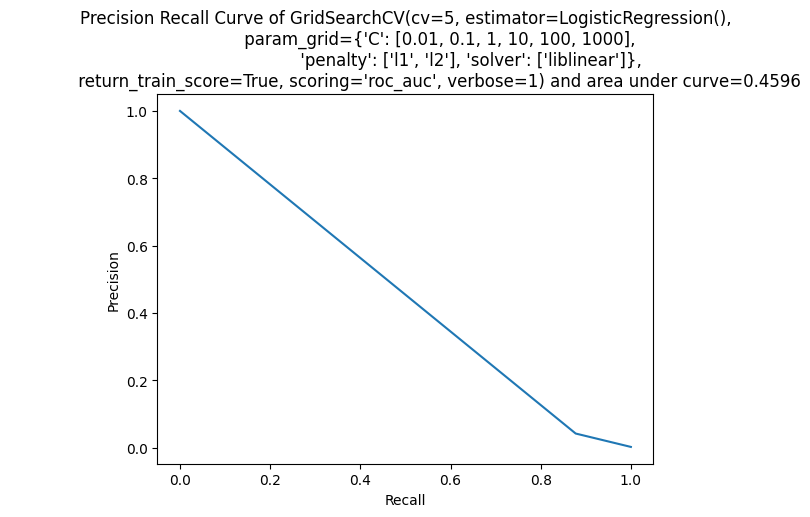

In [20]:
precision,recall,threshold=precision_recall_curve(y_test,Y_pred)
plt.plot(recall,precision)
plt.title('Precision Recall Curve of {} and area under curve={:0.4f}'.format(Lr_cv,auc(recall,precision)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**ADASYN**

In [22]:
adasyn=ADASYN(random_state=5)
X_train_a,Y_train_a=adasyn.fit_resample(x_train,y_train)

In [23]:
#defining a function for a model so that it reduces the code that we have to write again for every single model
def Model_Report(model,X_train_a,x_test,Y_train_a,y_test):
  #training the data to specified model
    model.fit(X_train_a,Y_train_a)
  #predicting data(testing)
    Y_pred_a=model.predict(x_test)
  #classification report for a specified model
    print('Following is the classification report of {}'.format(model))
    print(classification_report(y_test,Y_pred_a))
    logistic_fpr, logistic_tpr, thresholds = roc_curve(y_test, Y_pred_a)
  #ROC Curve
    auc_value=auc(logistic_fpr, logistic_tpr)
    plt.plot(logistic_fpr, logistic_tpr, marker='.')
    plt.title('ROC-AUC Curve of {} and area under curve={:0.4f}'.format(model,auc_value))
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.show()
      #PR Curve
    precision,recall,threshold=precision_recall_curve(y_test,Y_pred_a)
    plt.plot(recall,precision)
    plt.title('Precision Recall Curve of {} and area under curve={:0.4f}'.format(model,auc(recall,precision)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

Following is the classification report of LogisticRegression()
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.06      0.90      0.12        49

    accuracy                           0.98     28481
   macro avg       0.53      0.94      0.55     28481
weighted avg       1.00      0.98      0.99     28481



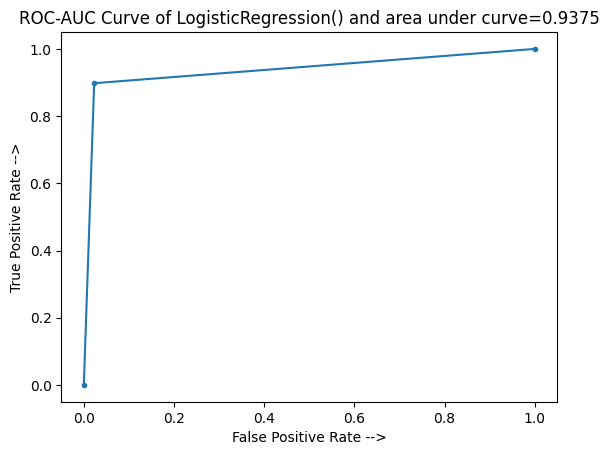

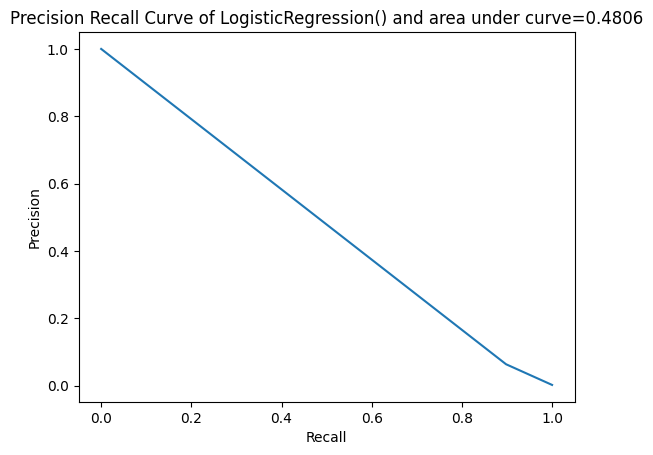

In [24]:
#Logistice regression model
Model_Report(LogisticRegression(),X_train_a,x_test,Y_train_a,y_test)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
folds=KFold(n_splits=5, shuffle=True, random_state=5)
params={"C":[0.01,0.1,1,10,100,1000],"penalty":["l1","l2"],"solver":["liblinear"]}
Lr=LogisticRegression()
Lr_cv=GridSearchCV(estimator=Lr,
                         param_grid=params,
                         scoring="roc_auc",
                         cv=5,
                         verbose=1,
                         return_train_score=True)

Lr_cv.fit(X_train_a,Y_train_a)

print("Best Parameters :", Lr_cv.best_params_)
print('Best ROC AUC Score :', Lr_cv.best_score_)

Y_pred=Lr_cv.predict(x_test)
roc_auc=roc_auc_score(y_test,Y_pred_a)
print("Test ROC AUC Score :",roc_auc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
L_R=LogisticRegression(C=0.1)
L_R_model=L_R.fit(X_train,Y_train)
Y_pred=L_R.predict(x_test)
print(classification_report(y_test,Y_pred))

In [ ]:
precision,recall,threshold=precision_recall_curve(y_test,Y_pred)
plt.plot(recall,precision)
plt.title('Precision Recall Curve of {} and area under curve={:0.4f}'.format(Lr_cv,auc(recall,precision)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()